## Data Description 

Data Types: The dataset consists of both numerical and categorical data types. The dataset include Make, Model, Year, Mileage, condition and Price.

Make: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford).  
Model: The specific model of the car (e.g., Camry, Civic, F-150).  
Year: The manufacturing year of the car.  
Mileage: The total mileage (in miles) of the car.  
Condition: The condition of the car, categorized as Excellent, Good, or Fair.  
Price: The price of the car.  

Size: The dataset contains a certain number of rows, each representing a unique car entry, and a set of columns describing various attributes of the cars.  

Source: The dataset was generated synthetically for the purpose of this analysis. It was created using a Python script that simulated car prices based on random values and predefined factors to mimic real-world variability.  

Purpose: The dataset is used for exploratory data analysis (EDA) and modeling tasks. It serves as a sample dataset to demonstrate data analysis techniques, such as data cleaning, visualization, and predictive modeling, in a car price prediction context.  



In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

- Data Preprocessing

In [140]:
cars = pd.read_csv('c:/Users/lorth/OneDrive/Desktop/Notebook/Datas/CarPricesPrediction.csv')
cars

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90


In [141]:
cars.drop(['Unnamed: 0'], axis = 1, inplace = True)
cars

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


In [142]:
cars.isna().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [143]:
cars.duplicated().sum()

0

In [144]:
cars['Make'].value_counts()

Make
Chevrolet    209
Toyota       205
Ford         199
Honda        199
Nissan       188
Name: count, dtype: int64

In [145]:
cars['Model'].value_counts()

Model
Altima       226
Camry        212
Silverado    192
F-150        188
Civic        182
Name: count, dtype: int64

In [146]:
cars.describe()

,Year,Mileage,Price
count,1000.00000,1000.000000,1000.000000
mean,2015.86500,78796.927000,22195.205650
std,3.78247,39842.259941,4245.191585
min,2010.00000,10079.000000,12613.000000
25%,2013.00000,44942.750000,18961.862500
50%,2016.00000,78056.500000,22247.875000
75%,2019.00000,112366.250000,25510.275000
max,2022.00000,149794.000000,31414.900000


In [147]:
cars.corr(numeric_only= True )

,Year,Mileage,Price
Year,1.000000,-0.01685,-0.883093
Mileage,-0.016850,1.00000,-0.454250
Price,-0.883093,-0.45425,1.000000


- Data Visualization

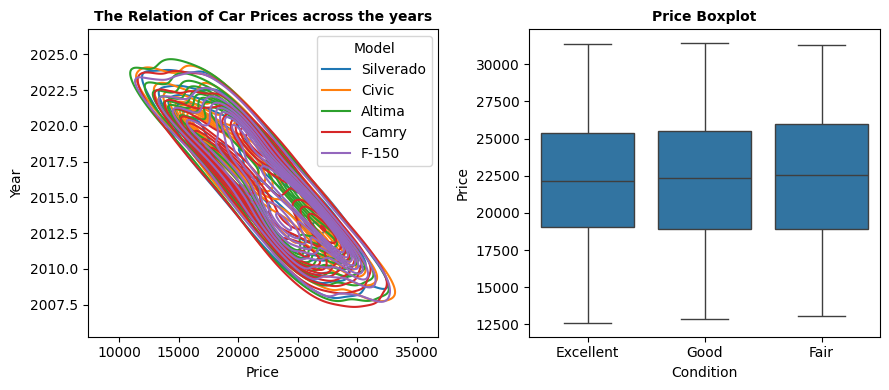

In [148]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
sns.kdeplot(data = cars, x = 'Price', y = 'Year', hue = 'Model', ax = ax[0])
ax[0].set_title('The Relation of Car Prices across the years', fontsize = 'medium', fontweight = 'bold')
sns.boxplot(cars, y = 'Price', x = 'Condition', ax = ax[1])
ax[1].set_title('Price Boxplot', fontsize = 'medium',fontweight = 'bold')
plt.tight_layout()

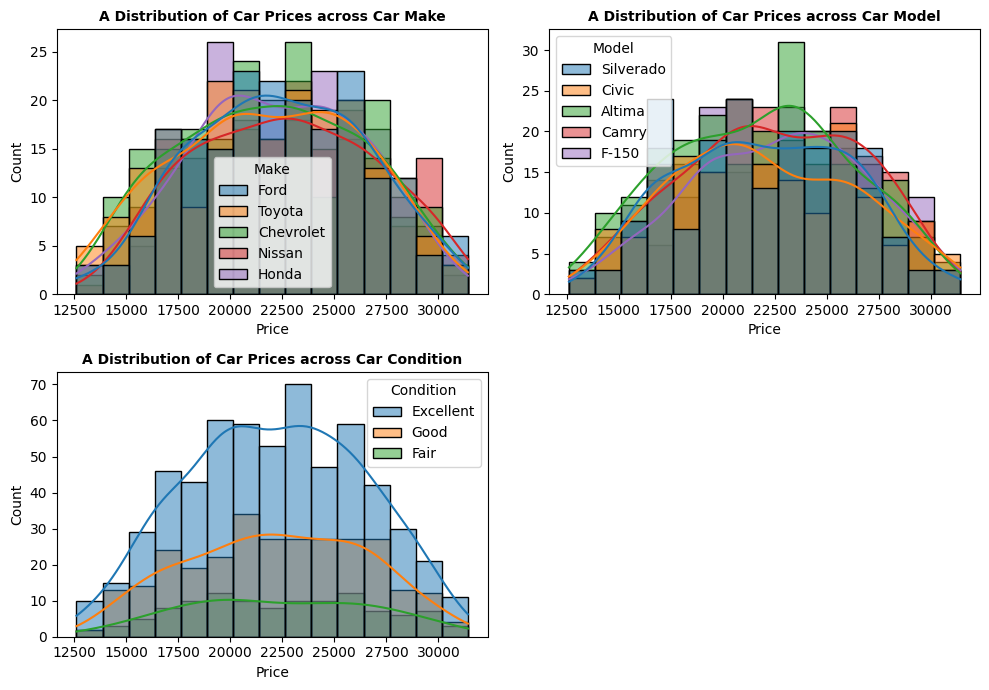

In [149]:
columns = ['Make', 'Model', 'Condition']
plt.figure(figsize = (10, 7))
for i, col in enumerate(columns):
    plt.subplot(2,2,1+i),
    sns.histplot(data = cars, x = 'Price', kde = True, hue = col)
    plt.title(f'A Distribution of Car Prices across Car {col}', fontsize = 'medium', fontweight = 'bold')
    plt.tight_layout()


In [150]:
val = cars.groupby('Make')['Model'].value_counts().reset_index()
plot = px.bar(val, x = 'Make', y = 'count', color = 'Model', barmode = 'group' )
plot.update_layout(title = '<b>The Model of the car and the Company that produced it</b>')
plot.show()


- Feature Engineering

In [151]:
encoder = LabelEncoder()
cars['Make'] = encoder.fit_transform(cars['Make'])
cars['Model'] = encoder.fit_transform(cars['Model'])
cars['Condition'] = encoder.fit_transform(cars['Condition'])
cars

,Make,Model,Year,Mileage,Condition,Price
0,1,4,2022,18107,0,19094.75
1,4,4,2014,13578,0,27321.10
2,0,2,2016,46054,2,23697.30
3,1,2,2022,34981,0,18251.05
4,0,2,2019,63565,0,19821.85
...,...,...,...,...,...,...
995,3,1,2010,149032,0,24548.50
996,0,3,2014,20608,0,26969.70
997,1,0,2016,109851,2,20507.55
998,4,4,2010,11704,2,31414.90


In [152]:
y = cars['Price']
X = cars.drop('Price', axis = 1)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 43)

Results of Linear Regression model
MSE of model: 0.004348519232318063
RMSE: 0.0659433031650528
R2: 0.9999999997409678


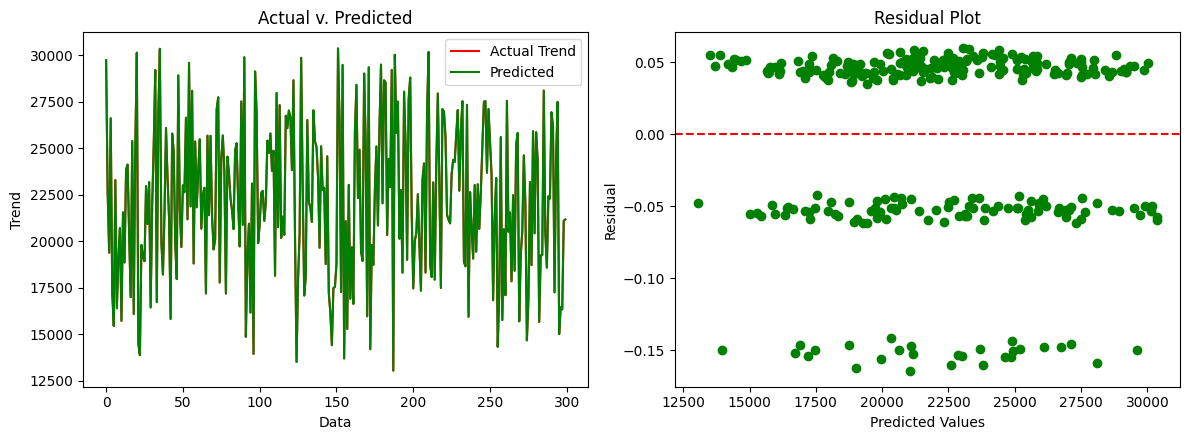

In [154]:
LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)
# Calculate predicted Y values
y_pred = LinearRegression.predict(X_test)
# Calculate the Error 
residual = y_test - y_pred
    
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test,y_pred, squared = False) 
R2 = r2_score(y_test, y_pred)

print(f'Results of Linear Regression model')
print(f'MSE of model: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')

plt.figure(figsize = (12,4.5))

# Plotting Actual vs. Predicted 
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend', color = 'red')
plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted', color = 'green')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual v. Predicted')

    # Plotting Residuals 
plt.subplot(1,2,2)
plt.scatter(y_pred, residual, color = 'green')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')


plt.tight_layout()
plt.show()


Results of Ridge Regression model
MSE of model: 0.13838177191981763
RMSE: 0.37199700525651763
R2: 0.9999999917568856


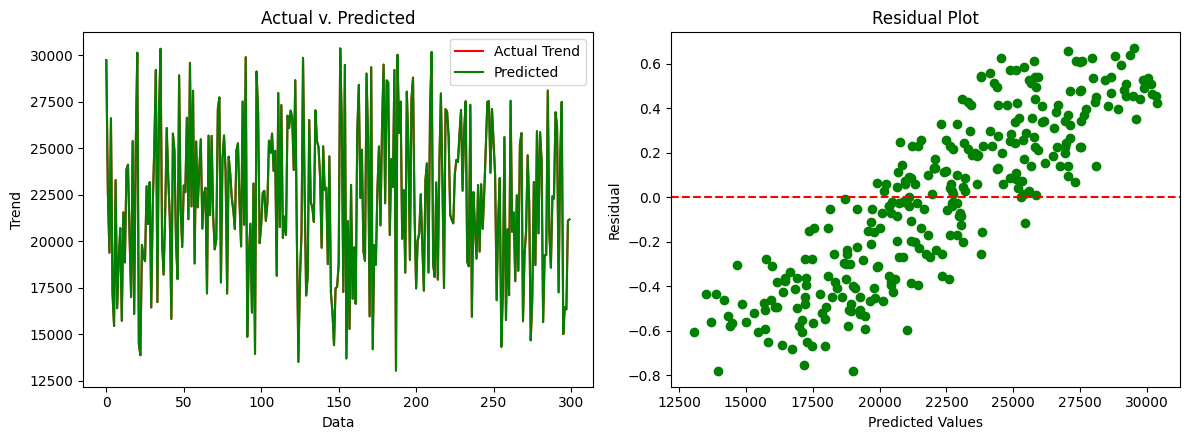

In [155]:
RidgeReg = Ridge()
RidgeReg.fit(X_train, y_train)
# Calculate predicted Y values
y_pred = RidgeReg.predict(X_test)
# Calculate the Error 
residual = y_test - y_pred
    
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test,y_pred, squared = False) 
R2 = r2_score(y_test, y_pred)

print(f'Results of Ridge Regression model')
print(f'MSE of model: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')

plt.figure(figsize = (12,4.5))

# Plotting Actual vs. Predicted 
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend', color = 'red')
plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted', color = 'green')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual v. Predicted')

    # Plotting Residuals 
plt.subplot(1,2,2)
plt.scatter(y_pred, residual, color = 'green')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')


plt.tight_layout()
plt.show()


Results of Decision Tree Regressor model
MSE of model: 41597.76195833329
RMSE: 203.95529401889348
R2: 0.9975221078217794


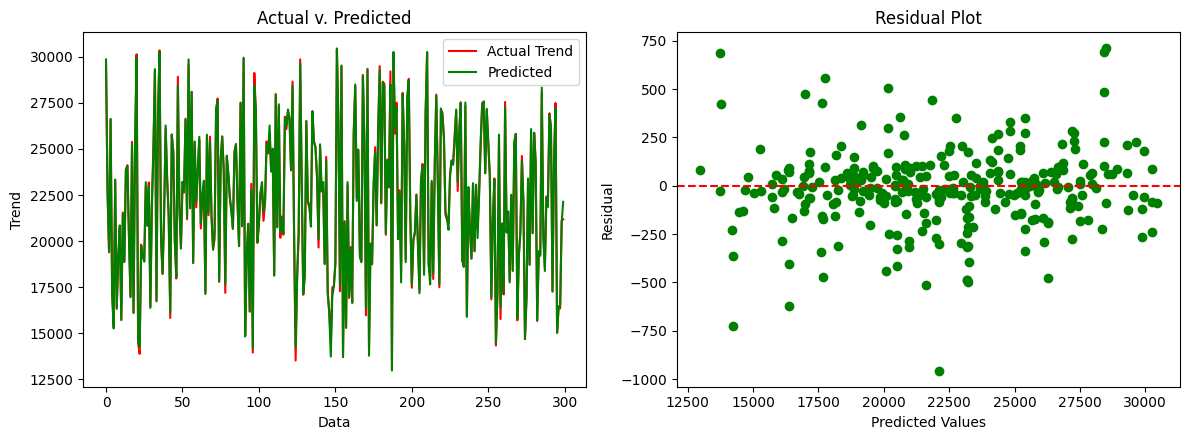

In [156]:
Decision_Tree_Regressor = DecisionTreeRegressor()
Decision_Tree_Regressor.fit(X_train, y_train)
# Calculate predicted Y values
y_pred = Decision_Tree_Regressor.predict(X_test)
# Calculate the Error 
residual = y_test - y_pred
    
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test,y_pred, squared = False) 
R2 = r2_score(y_test, y_pred)

print(f'Results of Decision Tree Regressor model')
print(f'MSE of model: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')

plt.figure(figsize = (12,4.5))

# Plotting Actual vs. Predicted 
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend', color = 'red')
plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted', color = 'green')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual v. Predicted')

    # Plotting Residuals 
plt.subplot(1,2,2)
plt.scatter(y_pred, residual, color = 'green')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')


plt.tight_layout()
plt.show()

Results of RandomForestRegression model
MSE of model: 12221.096580828078
RMSE: 110.54906865653857
R2: 0.9992720146901835


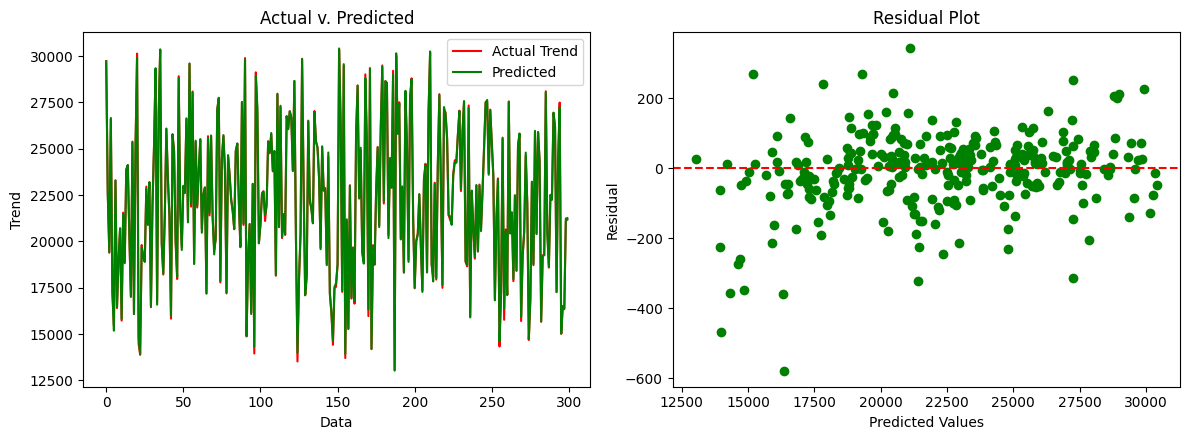

In [157]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
# Calculate predicted Y values
y_pred = RFR.predict(X_test)
# Calculate the Error 
residual = y_test - y_pred
    
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test,y_pred, squared = False) 
R2 = r2_score(y_test, y_pred)

print(f'Results of RandomForestRegression model')
print(f'MSE of model: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')

plt.figure(figsize = (12,4.5))

# Plotting Actual vs. Predicted 
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend', color = 'red')
plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted', color = 'green')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual v. Predicted')

    # Plotting Residuals 
plt.subplot(1,2,2)
plt.scatter(y_pred, residual, color = 'green')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')


plt.tight_layout()
plt.show()

Results of Lasso Regression model
MSE of model: 0.06788239098140374
RMSE: 0.2605424936193782
R2: 0.9999999959563871


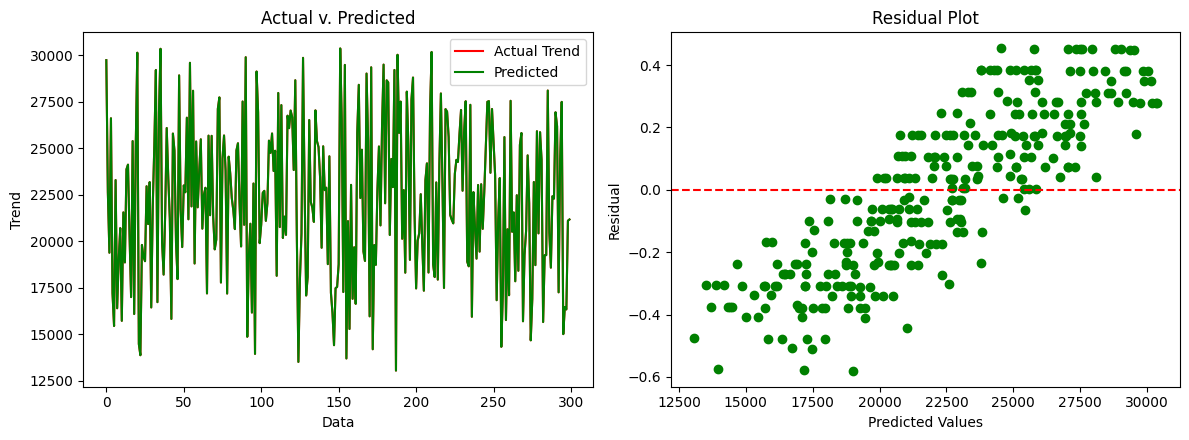

In [158]:
Lassoreg = Lasso()
Lassoreg.fit(X_train, y_train)
# Calculate predicted Y values
y_pred = Lassoreg.predict(X_test)
# Calculate the Error 
residual = y_test - y_pred
    
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test,y_pred, squared = False) 
R2 = r2_score(y_test, y_pred)

print(f'Results of Lasso Regression model')
print(f'MSE of model: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')

plt.figure(figsize = (12,4.5))

# Plotting Actual vs. Predicted 
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend', color = 'red')
plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted', color = 'green')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual v. Predicted')

    # Plotting Residuals 
plt.subplot(1,2,2)
plt.scatter(y_pred, residual, color = 'green')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')


plt.tight_layout()
plt.show()

Results of Support Vector Regression model
MSE of model: 16645627.225529028
RMSE: 4079.9052961470843
R2: 0.008454600393455247


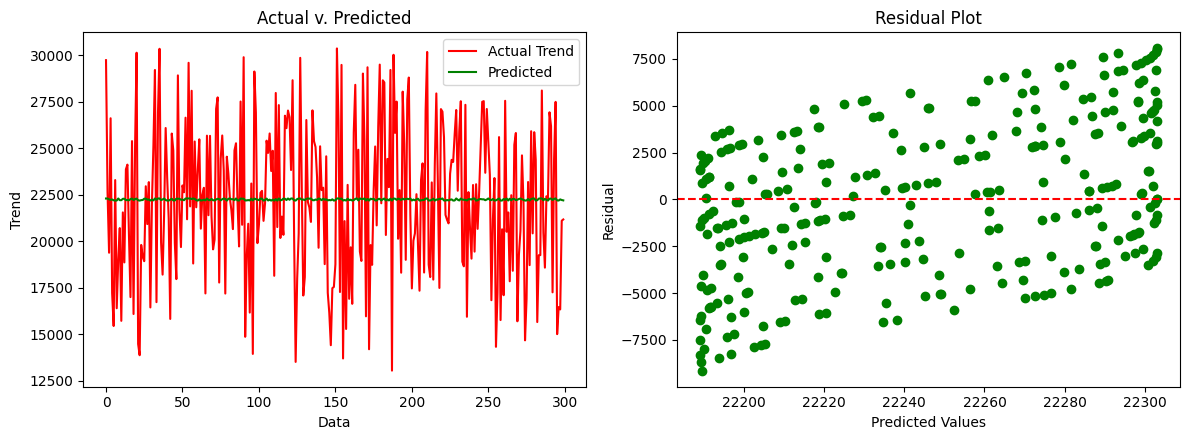

In [159]:
SVR = SVR()
SVR.fit(X_train, y_train)
# Calculate predicted Y values
y_pred = SVR.predict(X_test)
# Calculate the Error 
residual = y_test - y_pred
    
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test,y_pred, squared = False) 
R2 = r2_score(y_test, y_pred)

print(f'Results of Support Vector Regression model')
print(f'MSE of model: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')

plt.figure(figsize = (12,4.5))

# Plotting Actual vs. Predicted 
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend', color = 'red')
plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted', color = 'green')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual v. Predicted')

    # Plotting Residuals 
plt.subplot(1,2,2)
plt.scatter(y_pred, residual, color = 'green')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')


plt.tight_layout()
plt.show()


In [160]:
table = {'Models' : ['Linear Regression', 'Ridge', 'Decision Tree Regressor','Random Forest Regressor', 'Lasso', 'Support Vector Regression'],
'RMSE_score' : [0.0659433031650528, 0.37199700525651763, 203.5751648040595, 110.1430049669246, 0.2605424936193782, 4079.9052961470843]}
table = pd.DataFrame(table)
table

,Models,RMSE_score
0,Linear Regression,0.065943
1,Ridge,0.371997
2,Decision Tree Regressor,203.575165
3,Random Forest Regressor,110.143005
4,Lasso,0.260542
5,Support Vector Regression,4079.905296


<Axes: xlabel='RMSE_score', ylabel='Models'>

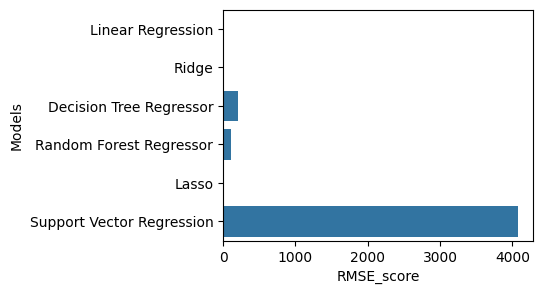

In [161]:
plt.figure(figsize = (4,3))
sns.barplot(table, y = 'Models', x = 'RMSE_score')


The Lower the RMSE_Score of the Model for prediction, the better the model.